<a href="https://colab.research.google.com/github/Juacardonaca/Carpeta1SyS-/blob/main/An%C3%A1lisis_de_un_p%C3%A9ndulo_el%C3%A1stico_amortiguado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Primer Punto##
 Encuentre la funcion de transferencia que caracteriza el sistema masa, resorte, amortiguador, presentado en la siguiente Figura (asuma condiciones iniciales cero):

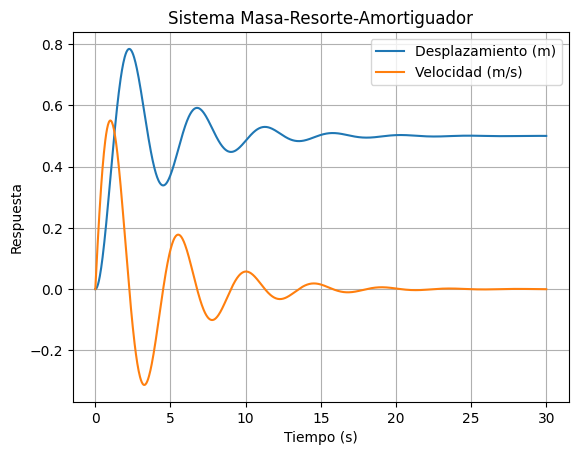

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0  # Masa
c = 0.5  # Coeficiente de amortiguamiento
k = 2.0  # Constante del resorte

# Definir la fuerza externa como una función del tiempo
def fuerza(t):
    return 1.0 if t >= 0 else 0.0  # Fuerza escalón unitario

# Definir la ecuación diferencial del sistema
def sistema(t, y):
    x, v = y
    dxdt = v
    dvdt = (fuerza(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Condiciones iniciales: [desplazamiento inicial, velocidad inicial]
condiciones_iniciales = [0.0, 0.0]

# Intervalo de tiempo para la simulación
t_span = (0, 30)  # De 0 a 10 segundos
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Puntos de evaluación para hacer que sea más fina la gráfica

# Resolver la ecuación diferencial
solucion = solve_ivp(sistema, t_span, condiciones_iniciales, t_eval=t_eval)

plt.plot(solucion.t, solucion.y[0], label='Desplazamiento (m)')
plt.plot(solucion.t, solucion.y[1], label='Velocidad (m/s)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Sistema Masa-Resorte-Amortiguador')
plt.legend()
plt.grid()
plt.show()


##Punto 2##
Posteriormente, encuentre el sistema equivalente del modelo masa, resorte, amortiguador


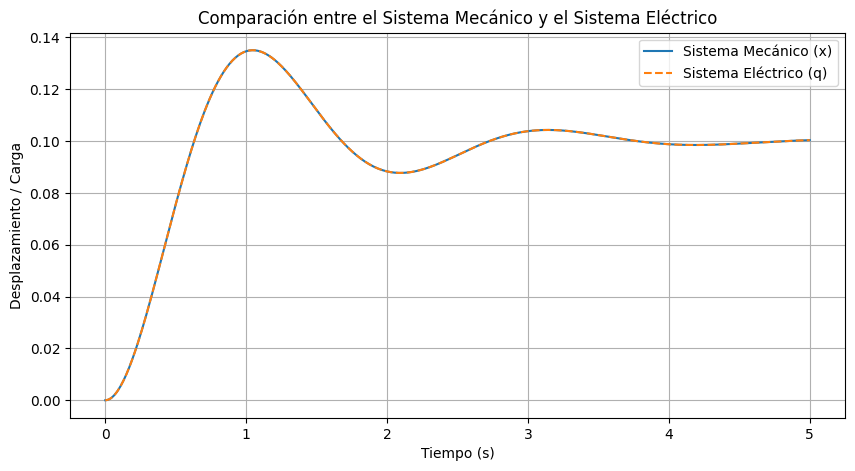

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

m = 1.0
c = 2.0   # (amortiguamiento)
k = 10.0  # (constante del resorte)

# Equivalencias en el circuito RLC
L = m       # Inductancia
R = c       # Resistencia
C = 1/k     # Capacitancia

# Definir la entrada (fuerza/voltaje) como un escalón unitario
def entrada(t):
    return 1.0 if t >= 0 else 0.0

# Definir la ecuación del sistema mecánico
def sistema_mecanico(t, y):
    x, v = y
    dxdt = v
    dvdt = (entrada(t) - c * v - k * x) / m
    return [dxdt, dvdt]

#ecuación del sistema eléctrico
def sistema_electrico(t, y):
    q, i = y
    dqdt = i
    didt = (entrada(t) - R * i - (q / C)) / L
    return [dqdt, didt]

# Condiciones iniciales
condiciones_iniciales = [0.0, 0.0]

# Intervalo de tiempo
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Resolver ecuaciones diferenciales
sol_mec = solve_ivp(sistema_mecanico, t_span, condiciones_iniciales, t_eval=t_eval)
sol_elec = solve_ivp(sistema_electrico, t_span, condiciones_iniciales, t_eval=t_eval)

# Graficar los resultados
plt.figure(figsize=(10, 5))
plt.plot(sol_mec.t, sol_mec.y[0], label="Sistema Mecánico (x)")
plt.plot(sol_elec.t, sol_elec.y[0], '--', label="Sistema Eléctrico (q)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Desplazamiento / Carga")
plt.title("Comparación entre el Sistema Mecánico y el Sistema Eléctrico")
plt.legend()
plt.grid()
plt.show()


##Punto 3##

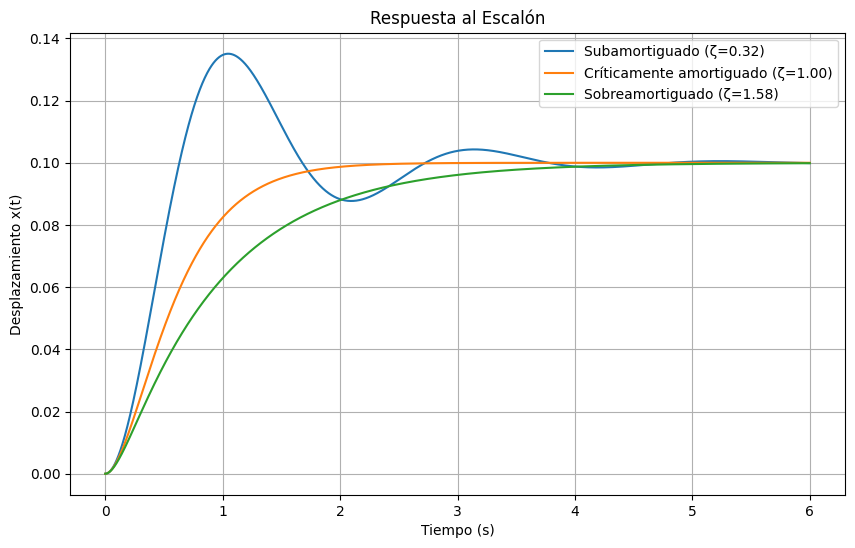

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

#diferentes valores de c para los tres casos
parametros = {
    "Subamortiguado": {"m": 1.0, "k": 10.0, "c": 2.0},
    "Críticamente amortiguado": {"m": 1.0, "k": 10.0, "c": 6.32},
    "Sobreamortiguado": {"m": 1.0, "k": 10.0, "c": 10.0},
}

# Definimos la entrada como un escalón unitario
def entrada(t):
    return 1.0 if t >= 0 else 0.0

# Definimos la ecuación diferencial del sistema mecánico
def sistema_masa_resorte(t, y, m, k, c):
    x, v = y
    dxdt = v
    dvdt = (entrada(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Intervalo de tiempo
t_span = (0, 6)
t_eval = np.linspace(t_span[0], t_span[1], 5000)
condiciones_iniciales = [0.0, 0.0]  # Posición y velocidad inicial

plt.figure(figsize=(10, 6))

# Simulación para cada caso
for caso, valores in parametros.items():
    sol = solve_ivp(sistema_masa_resorte, t_span, condiciones_iniciales, t_eval=t_eval,
                    args=(valores["m"], valores["k"], valores["c"]))

    plt.plot(sol.t, sol.y[0], label=f"{caso} (ζ={valores['c'] / (2 * np.sqrt(valores['m'] * valores['k'])):.2f})")

# Configuración de la gráfica
plt.xlabel("Tiempo (s)")
plt.ylabel("Desplazamiento x(t)")
plt.title("Respuesta al Escalón")
plt.legend()
plt.grid()
plt.show()
